<a href="https://colab.research.google.com/github/Rik1995/Netflix-movies-and-tv-shows-clustering/blob/main/Ripan_khan_netflix_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

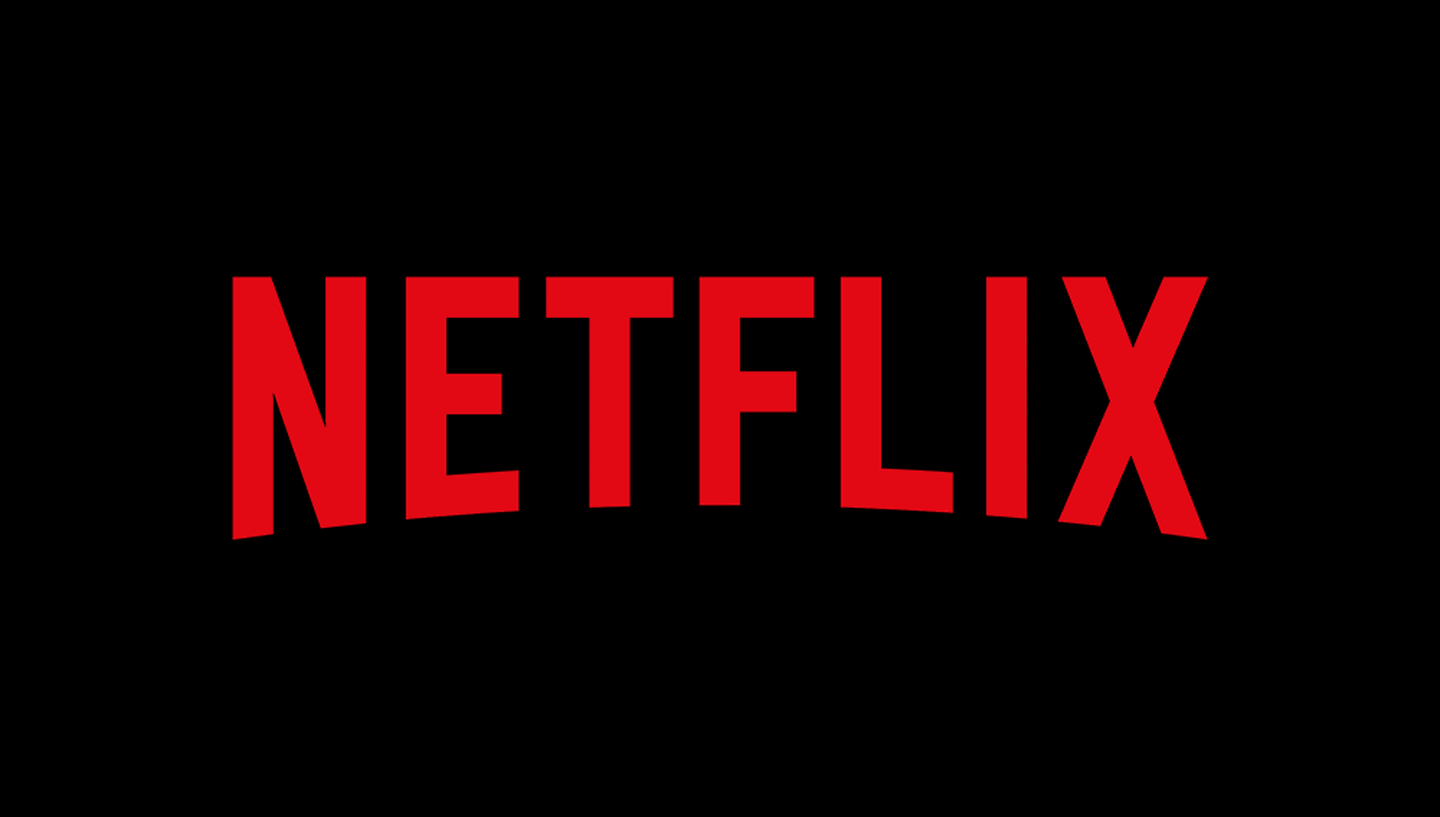

# **Project Name**    -  NETFLIX MOVIES AND TV SHOWS CLUSTERING


##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Name -** Ripan Khan

# **Project Summary -**

**Netflix, Inc.** is an American subscription video on-demand over-the-top streaming service and production company based in Los Gatos, California. Founded in 1997 by Reed Hastings and Marc Randolph in Scotts Valley, California, it offers a film and television series library through distribution deals as well as its own productions, known as Netflix Originals.


In this project,i have done following things:-

* Exploratory Data Analysis.

* Understanding what type content is available in different countries.

* Is Netflix has increasingly focusing on TV rather than movies in recent years.

* Clustering similar content by matching text-based features.

# **GitHub Link -**

https://github.com/Rik1995/Netflix-movies-and-tv-shows-clustering

# **Problem Statement**


**This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.**

**In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.**

**Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.** 

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [11]:
# Import Libraries
import numpy as np
import pandas as pd
import missingno as msno
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem.snowball import SnowballStemmer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
df=pd.read_csv('/content/drive/MyDrive/Unsupervised ml/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [4]:
# Dataset First Look
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

### Dataset Information

In [ ]:
# Dataset Info
df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isna().sum().sort_values(ascending=False)

In [ ]:
# Visualizing the missing values
null_counts = df.isnull().sum()/len(df)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts)),null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts,color='maroon')

### What did you know about your dataset?

* There are no duplicated values
* There are some missing values
* 2389 nulls in 'director'
718 in 'cast'
507 in 'country'
10 in 'date_added'
7 in rating

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

In [ ]:
# Dataset Describe
df.describe(include='all')

### Variables Description 

* **show_id** : Unique ID for every Movie / Tv Show

* **type** : Identifier - A Movie or TV Show

* **title** : Title of the Movie / Tv Show

* **director** : Director of the Movie

* **cast**: Actors involved in the movie / show

* **country** : Country where the movie / show was produced

* **date_added** : Date it was added on Netflix

* **release_year** : Actual Releaseyear of the movie / show

* **rating** : TV Rating of the movie / show

* **duration**: Total Duration - in minutes or number of seasons

* **listed_in** : Genre

* **description**: The Summary description

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

## 3. ***Data Wrangling***

### Data Wrangling Code

In [5]:
# Write your code to make your dataset analysis ready.
df['rating'].replace(np.nan, 'TV-MA',inplace  = True)
df['country'].replace(np.nan, 'United States',inplace  = True)
df['cast'].replace(np.nan, 'Missing info',inplace  = True)
df['director'].replace(np.nan, "Unknown",inplace  = True)

df = df[df['date_added'].notna()]

### What all manipulations have you done and insights you found?

* **Rating & Country** - As rating column has 0.08% null values , so replacing nulls with mose frequent TV-MA rating and doing same thing with country column

* **Cast**  - cast column has too many different values and more than 9% are missing, so there is no need to keep it but we are keeping it to perform EDA.

* **Date**  - there are few missing values for date column. so, lets drop missing value rows.

* **Director** - Director column has more then 30% null values ,I am replacing those missing values with the text "Unknown".

In [6]:
# Readjusting date added column and adding new features
df["date_added"] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### Chart - 1
### Types of contents

<AxesSubplot:xlabel='type', ylabel='count'>

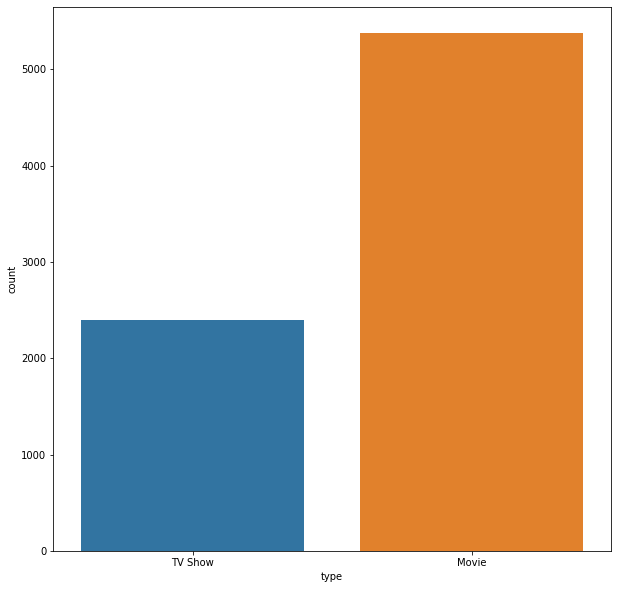

In [7]:
# Chart - 1 visualization code
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)
sns.countplot(x='type', data = df)

### Better visualisation

In [12]:
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
fig_donut = px.pie(df, names='type', height=300, width=600, hole=0.7,

title='Most watched on Netflix',

color_discrete_sequence=['#b20710', '#221f1f'])

fig_donut.update_traces(hovertemplate=None, textposition='outside',

textinfo='percent+label', rotation=90)

fig_donut.update_layout(margin=dict(t=60, b=30, l=0, r=0), showlegend=False,

plot_bgcolor='#333', paper_bgcolor='#333',

title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),

font=dict(size=17, color='#8a8d93'),

hoverlabel=dict(bgcolor="#444", font_size=13,

font_family="Lato, sans-serif"))
fig_donut.show(renderer='colab')

##### 1. Why did you pick the specific chart?

To check types of netflix content.

##### 2. What is/are the insight(s) found from the chart?

* It is evident that there are more movies on Netflix than TV shows.
* Netflix has 5377 movies, which is more than double the quantity of TV shows.
* There are about 70% movies and 30% TV shows on Netflix.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. It will help to decide which type of content is to be made most.

#### Chart - 2
Checking the common words in tite column.

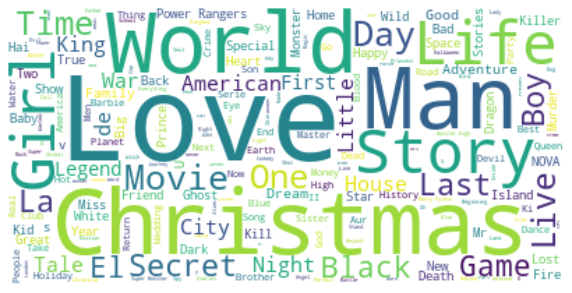

In [10]:
# Chart - 2 visualization code
#word cloud imports
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#subsetting df
df_word_cloud = df['title']
text = " ".join(word for word in df_word_cloud)
# Create stopword list:
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##### 1. Why did you pick the specific chart?

word clouds provide a simple and effective way to extract meaning from text data, helping to identify important patterns and themes that might otherwise be overlooked.

##### 2. What is/are the insight(s) found from the chart?

 It seems like words like "Love", "Man", "Chritmas", "World", "Story" are very common in titles.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it will help in deciding the title to make profit.

#### Chart - 3 
### Lets see which country produced most movies and tv show

In [13]:
# Chart - 3 visualization code 
country = df['country'].value_counts().reset_index()
country = country[country['country'] /  country['country'].sum() > 0.01]

fig = px.pie(country, values='country', names='index',color_discrete_sequence=px.colors.sequential.Plasma_r)
fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker = dict(line = dict(color = 'black', width = 2)))
fig.show()

##### 1. Why did you pick the specific chart?

To check which country produced more movies and tv shows.

##### 2. What is/are the insight(s) found from the chart?

United states produced the most movies and shows followed by India and UK.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

yes , it will help in deciding in which country to release the movies or the shows to make more profit. 

#### Chart - 4
### Top 10 Directors with most number of Movies/Shows on Netflix

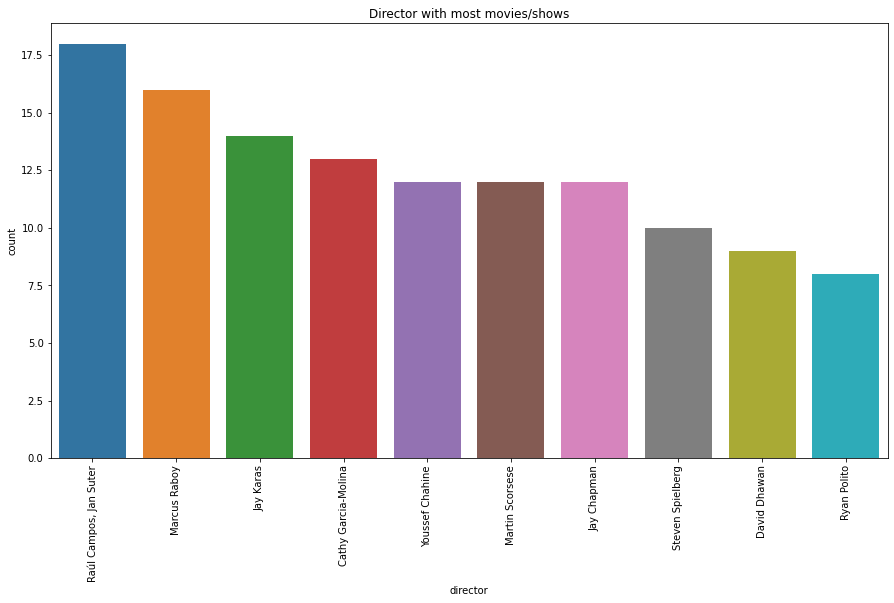

In [14]:
# Chart - 4 visualization code
direct=df.copy()
#removing unknown 
direct=direct[df['director']!='Unknown']
#plot for director
plt.figure(figsize = (15,8))
sns.countplot(x='director',data=direct,order=direct.director.value_counts().head(10).index)
plt.title('Director with most movies/shows')
plt.xticks(rotation = 90)
plt.show()

##### 1. Why did you pick the specific chart?

To check the top 10 directors with most views.

##### 2. What is/are the insight(s) found from the chart?

Raul Campos and Jan Suter collectively have the most content on Netflix followed by Marcus and Jay respectivly.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

yes, it will help us choose the director for the next movie or show.

#### Chart - 5
### Top 10 actors

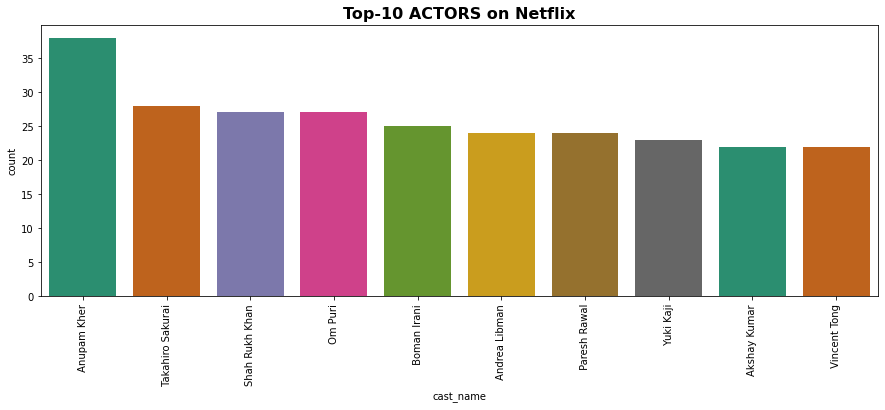

In [15]:
# Chart - 5 visualization code
df['cast_name'] = df['cast'].apply(lambda x :  x.split(',')) 
cast_count = []
for i in df['cast_name']: cast_count += i
cast_dict = dict((i, cast_count.count(i)) for i in cast_count)
df_cast_count = pd.DataFrame(cast_dict.values(),cast_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
    columns = {'index' : 'cast_name', 0 : 'count'}).iloc[1:11]
plt.figure(figsize=(15,5))
sns.barplot(x='cast_name',y='count',data=df_cast_count,palette="Dark2")
plt.title("Top-10 ACTORS on Netflix",size='16',fontweight="bold")
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

To check the top 10 actors with highest count of movies

##### 2. What is/are the insight(s) found from the chart?

The top actors on Netflix Movies, based on the number of titles, are Anupam Kher followed by Takahiro Sakurai ans Shahrukh Khan.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to decide which actor to cast in movies or shows to get more audience.

#### Chart - 6
Total Releases for Last 10 Years

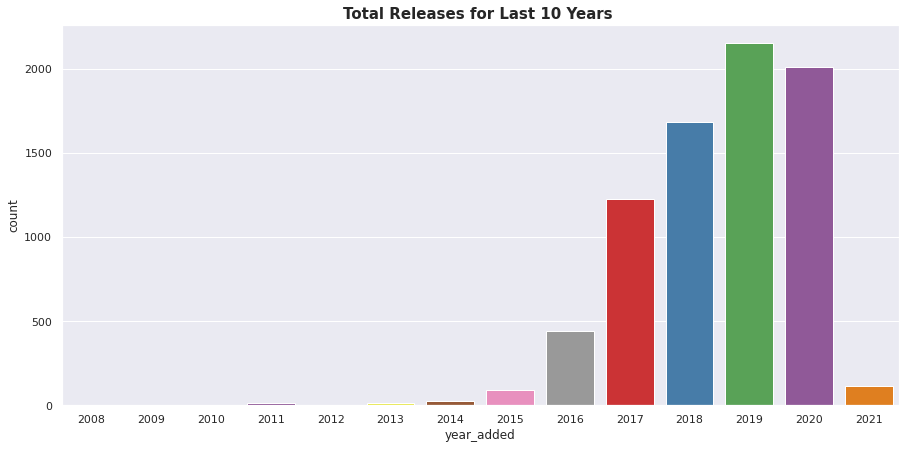

In [16]:
# Chart - 6 visualization code
# Total release for last 10 years
sns.set(rc={'figure.figsize':(15,7)})
sns.countplot(x='year_added',data=df,palette="Set1")

plt.title('Total Releases for Last 10 Years ',size='15',fontweight="bold")    
plt.show()

##### 1. Why did you pick the specific chart?

To check the total Releases for Last 10 Years.

##### 2. What is/are the insight(s) found from the chart?

The number of releases have significantly increased after 2015 and have dropped in 2021 becase of Corona situation.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

yes, it will help in creating a positive buisness impact.

#### Chart - 7
Checking the type and rating of the contents

In [17]:
# Chart - 7 visualization code
#distribution for content using plotly
temp_df = df['rating'].value_counts().reset_index()

# create trace1
trace1 = go.Bar(
                x = temp_df['index'],
                y = temp_df['rating'],
                marker = dict(color = 'rgb(255,165,0)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'MOST OF PROGRAMME ON NETFLIX IS TV-14 & TV-MA RATED' , xaxis = dict(title = 'Rating'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show(renderer='colab')

In [18]:
df1 = df[df["type"] == "TV Show"]
df2 = df[df["type"] == "Movie"]

temp_df1 = df1['rating'].value_counts().reset_index()
temp_df2 = df2['rating'].value_counts().reset_index()


# create trace1
trace1 = go.Bar(
                x = temp_df1['index'],
                y = temp_df1['rating'],
                name="TV Shows",
                marker = dict(color = 'rgb(249, 6, 6)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
# create trace2 
trace2 = go.Bar(
                x = temp_df2['index'],
                y = temp_df2['rating'],
                name = "Movies",
                marker = dict(color = 'rgb(26, 118, 255)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))


layout = go.Layout(template= "plotly_dark",title = 'RATING BY CONTENT TYPE' , xaxis = dict(title = 'Rating'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1, trace2], layout = layout)
fig.show(renderer='colab')

##### 1. Why did you pick the specific chart?

To check the types of shows and its ratings.

##### 2. What is/are the insight(s) found from the chart?

As we can see Tv mature audience got highest ratings for movies and also for shows. followed by R rated content for movies and kids tv shows for shows.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to decide which type of content to make most for profit.

#### Chart - 8
###Top ten Genre 

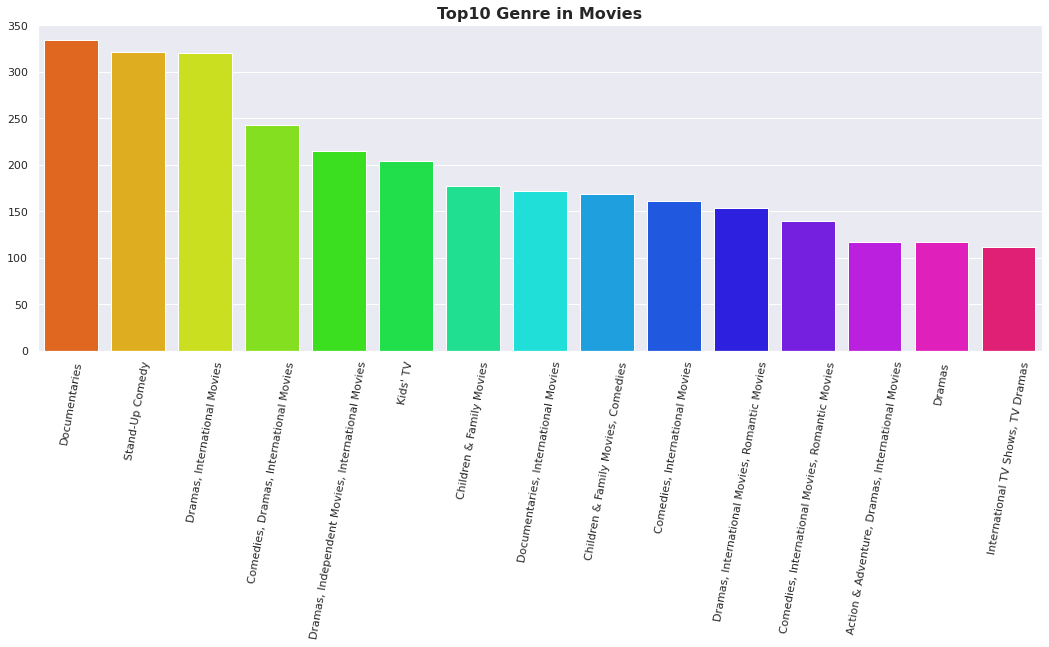

In [19]:
# Chart - 8 visualization code
plt.figure(figsize=(18,6))
sns.barplot(x = df["listed_in"].value_counts().head(15).index,
            y = df["listed_in"].value_counts().head(15).values,palette="hsv")
plt.xticks(rotation=80)
plt.title("Top10 Genre in Movies",size='16',fontweight="bold")
plt.show()

##### 1. Why did you pick the specific chart?

To check the Top 10 Genre in Movies.

##### 2. What is/are the insight(s) found from the chart?

From the graph, we can tell that Documentaries take the first place, followed by Stand-up Comedy and Dramas,International Movies.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to decide which genre movies to make most.

Here the Top 20 Genre in whole Netflix

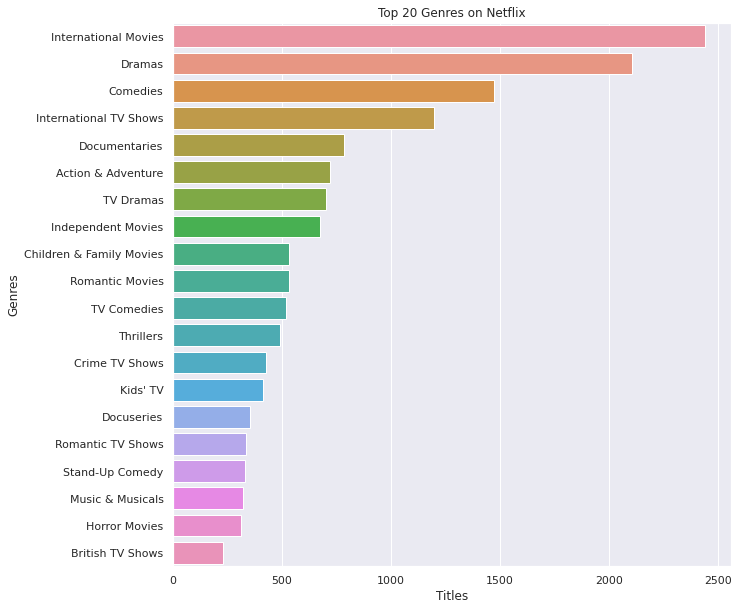

In [20]:
#Extract the Genres
filtered_genres = df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(10,10))

#Plot the count of top 20 genres
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

As you can see on whole Netflix genre, International movies dominated the list closely followed by Dramas and comedy.

#### Chart - 9
###Duration

<AxesSubplot:xlabel='duration', ylabel='Density'>

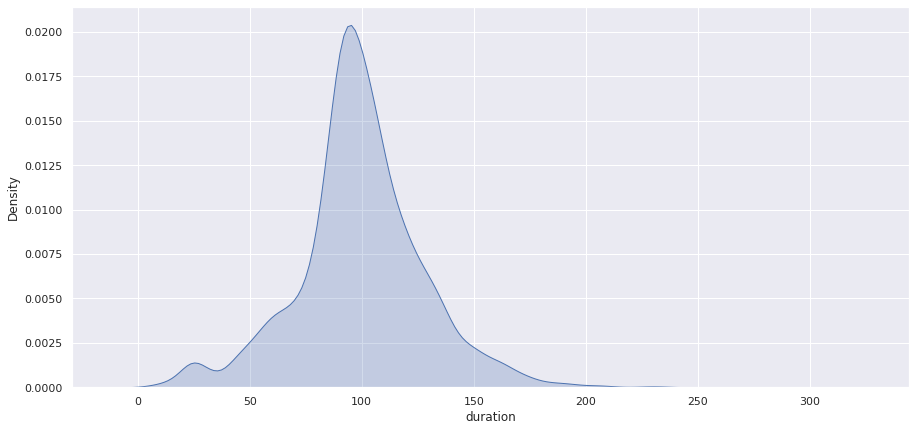

In [21]:
# Chart - 9 visualization code
#subsetting TV Show and Movie for duration
netflix_shows=df[df['type']=='TV Show']
netflix_movies=df[df['type']=='Movie']
#movie duration subsetting
netflix_movies['duration']=netflix_movies['duration'].str.replace(' min','')
netflix_movies['duration']=netflix_movies['duration'].astype(str).astype(int)
#Analysis on the duration of the movies 
sns.set(style="darkgrid")
sns.kdeplot(data=netflix_movies['duration'], shade=True)

##### 1. Why did you pick the specific chart?

To check the movie duration time.

##### 2. What is/are the insight(s) found from the chart?

* Above histogram plot, we can see that the duration for Netflix movies closely resembles a normal distribution with the average viewing time spanning about 90 minutes which seems to make sense.

* Most content are about 70 to 120 min duration for movies

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to decide what time duration most movies should be to attract more audience.

#### Chart - 10
###Word Cloud for Movie on Description Column

In [22]:
#word cloud for user rating review
def func_select_Category(category_name,category_column,column_of_choice):
  df_word_cloud = df[[category_column,column_of_choice]].dropna()
  df_word_cloud = df_word_cloud[df_word_cloud[category_column]==category_name]
  text = " ".join(word for word in df_word_cloud[column_of_choice])
  # Create stopword list:
  stopwords = set(STOPWORDS)
  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  # Display the generated image:
  # the matplotlib way:
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

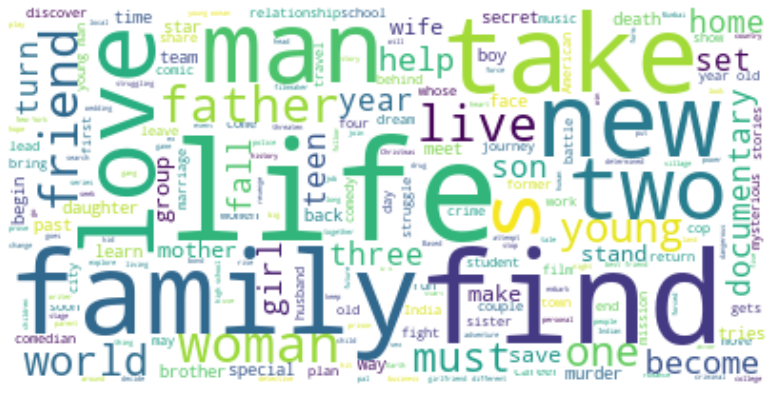

In [23]:
# Chart - 10 visualization code
## woeld cloud for movies
func_select_Category('Movie','type','description')

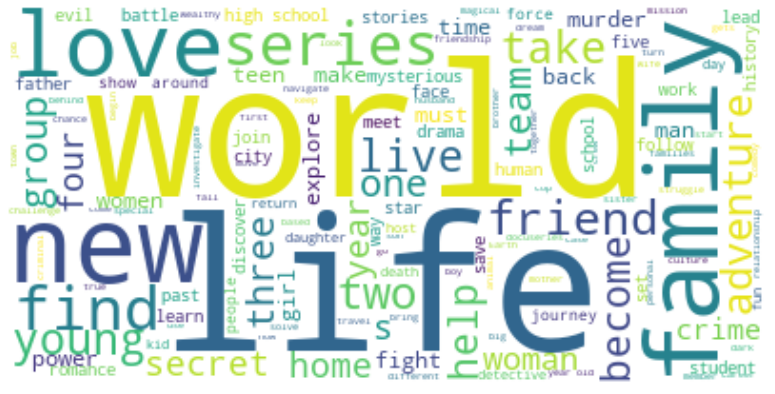

In [24]:
## world cloud for shows
func_select_Category('TV Show','type','description')

##### 1. Why did you pick the specific chart?

To check the common words in the description column. 

##### 2. What is/are the insight(s) found from the chart?

Most words like Life, family popping up in the movies.

Most words like Life, family popping up in the shows like movies before!

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

yes, it will help to create a positive buisness impact.

#### Chart - 11
###Is Netflix has increasingly focusing on TV rather than movies in recent years.?

In [25]:
# Chart - 11 visualization code
#subsetting data for visualisation
d1 = df[df["type"] == "TV Show"]
d2 = df[df["type"] == "Movie"]

col = "year_added"

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Scatter(
                    x=vc1[col], 
                    y=vc1["count"], 
                    name="TV Shows", 
                    marker=dict(color = 'rgb(249, 6, 6)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))

trace2 = go.Scatter(
                    x=vc2[col], 
                    y=vc2["count"], 
                    name="Movies", 
                    marker= dict(color = 'rgb(26, 118, 255)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(hovermode= 'closest', title = 'Content added over the years' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Count'),template= "plotly_dark")
fig = go.Figure(data = [trace1, trace2], layout=layout)
fig.show(renderer='colab')

##### 1. Why did you pick the specific chart?

Hyp : In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

##### 2. What is/are the insight(s) found from the chart?

As we can see the number of tv shows has increased but number of movies have also increased.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

yes, it will craeate a positive buisness impact.

#### Chart - 14 - Correlation Heatmap

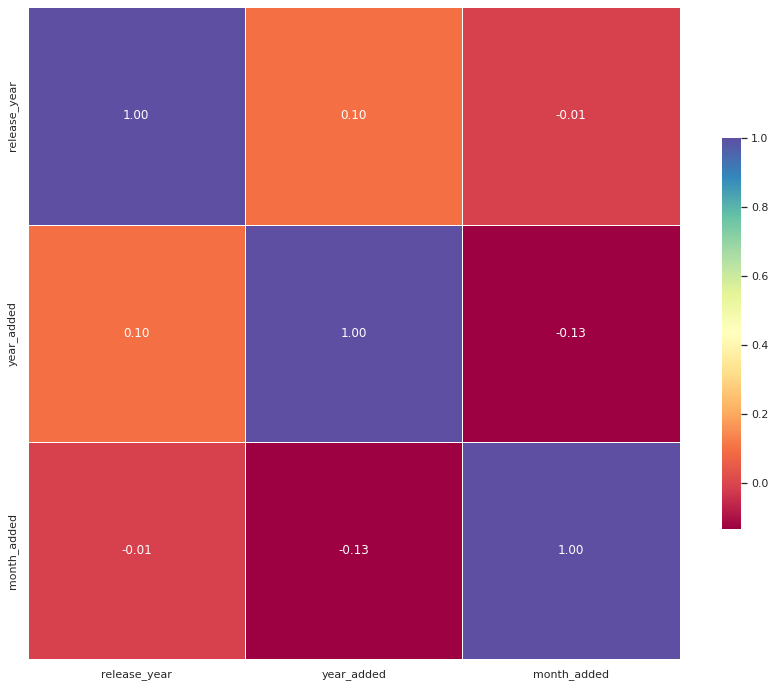

In [26]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), cmap="Spectral", cbar_kws={'shrink': .6}, square=True, annot=True, fmt='.2f', linewidths=.8)
plt.show()

###Most of the columns of the dataset are of string type so those are not possible to plot a Correlation heatmap.

#### Chart - 15 - Pair Plot 

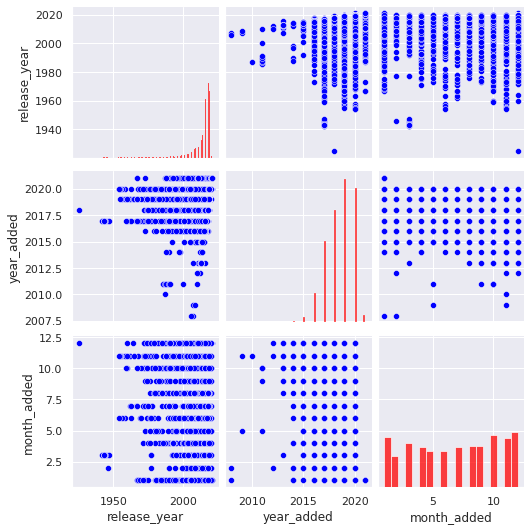

In [27]:
# Pair Plot visualization code
sns.pairplot(df,diag_kws={'color':'red'},plot_kws={'color':'blue'})

###Most of the columns of the dataset are of string type so those are not possible to plot a Pair Plot.

## ***5. Hypothesis Testing***

###Hypothetical Statement - 1

Here we will test that is there any relation between the year(year_added) of that content added with the type of the content(type).


* **Null Hypothesis:** year_added has no impact on type of content that gets added to the platform.

* **Alternative Hypothesis**: year_added has impact on type of content that gets added to the platform.

In [ ]:
hypo_data = pd.crosstab(df['type'], df['year_added'], margins=False)
hypo_data

In [ ]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import chisquare
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(hypo_data)

In [ ]:
p

Here we can see the p-value is greater than 0.05, so we can reject null hypothesis. 
So we can conclude that there is a impact of year_added on the type of content.

### Hypothetical Statement - 2

**The average duration of Movies released on Netflix is 90 min.**





#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis: N = 90**


**Alternate Hypothesis : N != 90**

In [ ]:
# For Hypothesis
from scipy.stats import *
import math


In [ ]:
# Parameter class

class findz:
  def proportion(self,sample,hyp,size):
    return (sample - hyp)/math.sqrt(hyp*(1-hyp)/size)
  def mean(self,hyp,sample,size,std):
    return (sample - hyp)*math.sqrt(size)/std
  def varience(self,hyp,sample,size):
    return (size-1)*sample/hyp

In [ ]:
#Calculating Variance and Z distribution

variance = lambda x : sum([(i - np.mean(x))**2 for i in x])/(len(x)-1)
zcdf = lambda x: norm(0,1).cdf(x)

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
def p_value(z,tailed):
  z = zcdf(z)
  if tailed=='l':
    return z
  elif tailed == 'r':
    return 1-z
  elif tailed == 'd':
    if z>0.5:
      return 2*(1-z)
    else:
      return 2*z
  else:
    return np.nan

In [ ]:
# Conclusion about P-value
def conclusion(p):
  significance_level = 0.05
  if p>significance_level:
    return f"Failed to reject the Null Hypothesis."
  else:
    return f"Null Hypothesis rejected "

**2. Perform an appropriate statistical test**

In [ ]:
# Perform Statistical Test to obtain P-Value

hypo = df["duration"].str.extract('(\d+)').rename(columns={0:"duration"})

# Getting the required parameter values for hypothesis testing

hypothesis_number = 32

sample_mean = hypo["duration"].mean()

size = len(hypo["duration"])

std = (variance(pd.to_numeric(hypo["duration"])))**0.5

In [ ]:
# Getting Z value

z = findz.mean(hypothesis_number,sample_mean,size,std)

# Getting P - Value

p = p_value(z = z, tailed='d')

# Getting Conclusion

print(conclusion(p))

##### Which statistical test have you done to obtain P-Value?

I have used Z-Test as the statistical testing to obtain P-Value and found the result that Null hypothesis is rejected and The average duration of Movies released on Netflix is not 90 min.

##### Why did you choose the specific statistical test?

 **Z-Test** is used in hypothesis testing to evaluate whether a finding or association is statistically significant or not.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
# already handled.

### 2. Handling Outliers

In [28]:
# Handling Outliers & Outlier treatments
##There aren't any outliers in the dataset as the column datatypes are of string format.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [30]:
# Expand Contraction
# creating tags column using all text column which one is used for model building purpose.
df['text_data'] = df['director'] + df['cast'] + df['country'] + \
                     df['rating'] + df['listed_in'] + df['description']

In [31]:
# checking the first row
df['text_data'][0]

'UnknownJoão Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso FrateschiBrazilTV-MAInternational TV Shows, TV Dramas, TV Sci-Fi & FantasyIn a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

#### 3. Removing Punctuations

In [32]:
# Remove Punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, which in effect deletes the punctuation marks.
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [33]:
# applying remove_punctuation function
df['text_data'] = df['text_data'].apply(remove_punctuation)

In [34]:
# checking the first row after the process
df['text_data'][0]

'UnknownJoão Miguel Bianca Comparato Michel Gomes Rodolfo Valente Vaneza Oliveira Rafael Lozano Viviane Porto Mel Fronckowiak Sergio Mamberti Zezé Motta Celso FrateschiBrazilTVMAInternational TV Shows TV Dramas TV SciFi  FantasyIn a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the 3 saved from squalor'

#### 5. Removing Stopwords & Removing White spaces

In [35]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [36]:
# create a set of English stop words
stop_words = stopwords.words('english')

# displaying stopwords
np.array(stop_words)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [39]:
# Remove Stopwords
def stopwords(text):
    '''a function for removing the stopword and lowercase the each word'''
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    # joining the list of words with space separator
    return " ".join(text)

In [40]:
# applying stopwords function.
df['text_data'] = df['text_data'].apply(stopwords)

In [41]:
# checking the first row again
df['text_data'][0]

'unknownjoão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschibraziltvmainternational tv shows tv dramas tv scifi fantasyin future elite inhabit island paradise far crowded slums get one chance join 3 saved squalor'

#### 8. Text Normalization

In [42]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# create an object of stemming function
stemmer = SnowballStemmer("english")

# define a function to apply stemming using SnowballStemmer
def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [43]:
# appying stemming function
df['text_data'] = df['text_data'].apply(stemming)

In [44]:
# checking the first row after the process
df['text_data'][0]

'unknownjoão miguel bianca comparato michel gome rodolfo valent vaneza oliveira rafael lozano vivian porto mel fronckowiak sergio mamberti zezé motta celso frateschibraziltvmaintern tv show tv drama tv scifi fantasyin futur elit inhabit island paradis far crowd slum get one chanc join 3 save squalor'

#### 10. Text Vectorization

In [45]:
# Vectorizing Text
# create the object of tfid vectorizer
tfidf = TfidfVectorizer(stop_words='english', lowercase=False, max_features = 10000)   # max features = 10000 to prevent system from crashing

# fit the vectorizer using the text data
tfidf.fit(df['text_data'])

# collect the vocabulary items used in the vectorizer
dictionary = tfidf.vocabulary_.items()

In [46]:
print(len(dictionary)) #number of independet features created from "text_data" columns

10000


In [47]:
# convert vector into array form for clustering
vector = tfidf.transform(df['text_data']).toarray()

# summarize encoded vector
print(vector)
print(f'shape of the vector : {vector.shape}')
print(f'datatype : {type(vector)}')

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
shape of the vector : (7777, 10000)
datatype : <class 'numpy.ndarray'>


##### Which text vectorization technique have you used and why?

I used the TF-IDF vectorizer, which stands for Term Frequency Inverse Document Frequency.

It transforms the text data into numerical data which can be easily processed by machine learning algorithms.

### 7. Dimesionality Reduction

In [49]:
# DImensionality Reduction (If needed)
from sklearn.decomposition import PCA
# using PCA to reduce dimensionality
pca = PCA(random_state=42)
pca.fit(vector)

PCA(random_state=42)

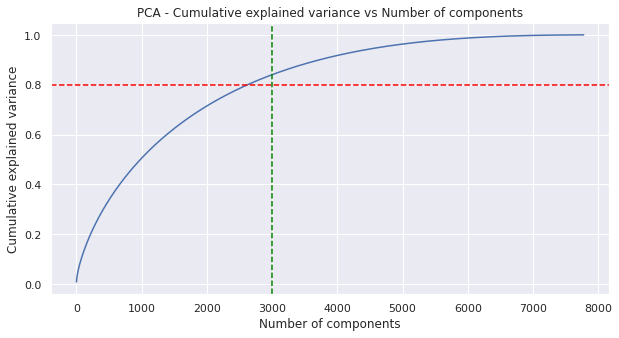

In [50]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs Number of components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.axhline(y= 0.8, color='red', linestyle='--')
plt.axvline(x= 3000, color='green', linestyle='--')
plt.show()

* We discover that approximately 7500 components account for 100 percent of the variance.

* 3000 components alone account for more than 80% of the variance.

* Therefore, we can take the top 3000 components to reduce dimensionality and simplify the model while still being able to capture more than 80% of the variance.

In [51]:
# reducing the dimensions to 3000 using pca
pca = PCA(n_components=3000, random_state=42)
pca.fit(vector)

PCA(n_components=3000, random_state=42)

In [52]:
# transformed features
X = pca.transform(vector)

# shape of transformed vectors
X.shape

(7777, 3000)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

I used Principal Component Analysis (PCA) to reduce the dimensionality of data.

Because It is a crucial step in machine learning and data analysis as it can help to improve the performance of models, reduce overfitting, and make it easier to visualize and interpret the data.

## ***7. ML Model Implementation***

### ML Model - 1

# K Means Clustering

In [53]:
# Sample code to run the KElbowVisualizer
from sklearn.cluster import KMeans

KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=21), k=(4, 22),
                 metric='silhouette', timings=False)

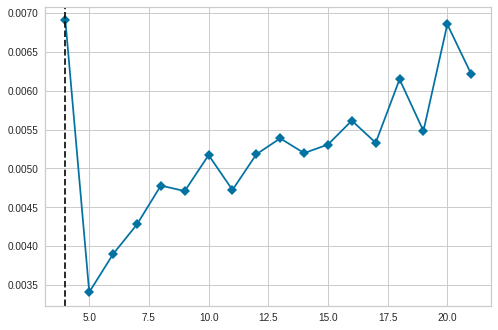

In [54]:
# Sample code to run the KElbowVisualizer
from sklearn.cluster import KMeans
# from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

#  # Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(4,22), metric='silhouette', timings=False
)

visualizer.fit(X)   

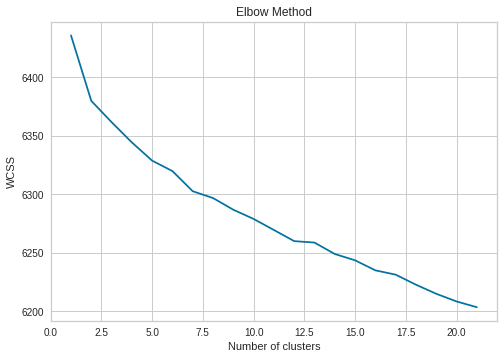

In [55]:
wcss = []
for i in range(1, 22):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 22), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From both the above plots, we have experimented and chosen 9 as optimal k

# Lets select optimal value of K as 9

In [ ]:
# fitting the k means algorithm on lower features

kmeans= KMeans(n_clusters=9, init= 'k-means++',max_iter=300, n_init=1)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
print("Silhouette Coefficient:  %0.3f"%silhouette_score(X, kmeans.labels_))

Silhouette Coefficient:  0.005


In [ ]:
#predict the labels of clusters.
label = kmeans.fit_predict(X)

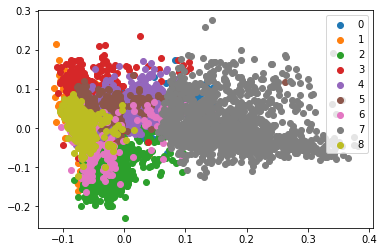

In [ ]:
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.legend()
plt.show()

## Labelling the dataset as per the cluster

In [ ]:
# kmeans label to cluster column
df['cluster'] = kmeans.labels_

In [ ]:
df

Unnamed: 0  ... cluster
0              0  ...       7
1              1  ...       2
2              2  ...       6
3              3  ...       4
4              4  ...       4
...          ...  ...     ...
7782        7782  ...       2
7783        7783  ...       1
7784        7784  ...       1
7785        7785  ...       7
7786        7786  ...       1

[7787 rows x 19 columns]

In [ ]:
#word cloud imports
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
#word cloud for user rating review
def func_select_Category(category_name,column_of_choice):
  df_word_cloud = df[['cluster',column_of_choice]].dropna()
  df_word_cloud = df_word_cloud[df_word_cloud['cluster']==category_name]
  text = " ".join(word for word in df_word_cloud[column_of_choice])
  # Create stopword list:
  stopwords = set(STOPWORDS)
  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  # Display the generated image:
  # the matplotlib way:
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

## Word Cloud on Description col for different cluster

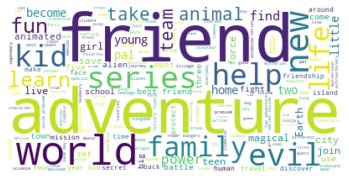

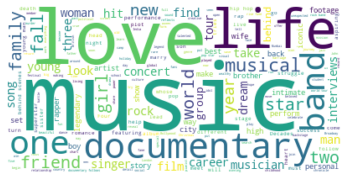

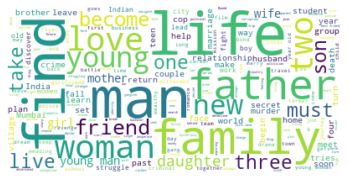

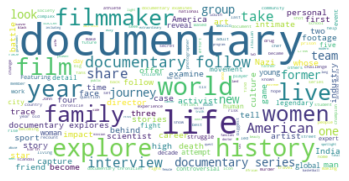

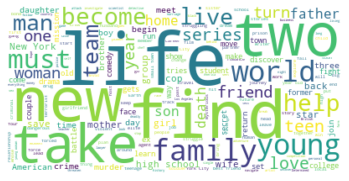

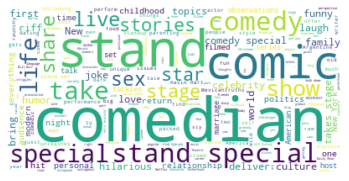

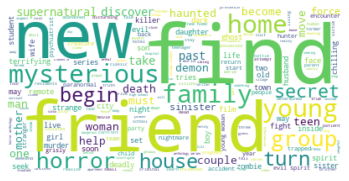

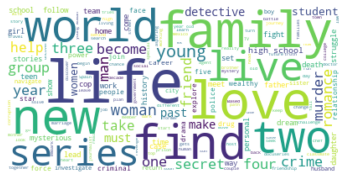

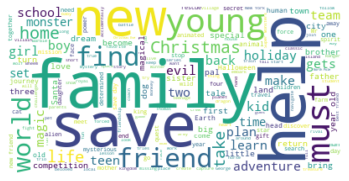

In [ ]:
for i in range(9):
  func_select_Category(i,'description')

## Word Cloud on Title col for different cluster

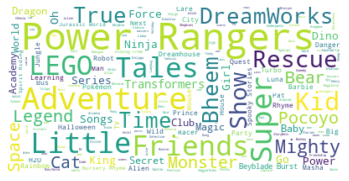

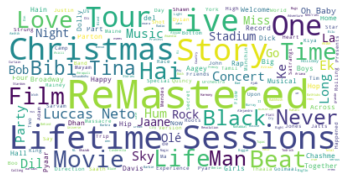

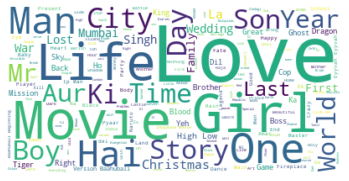

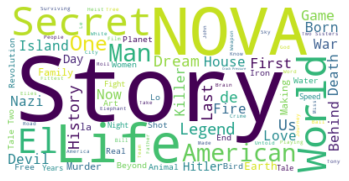

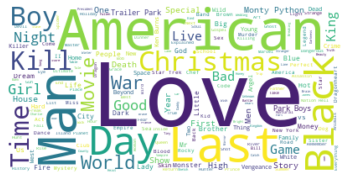

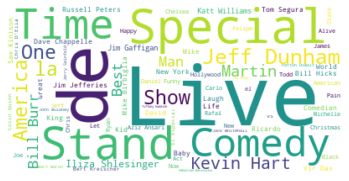

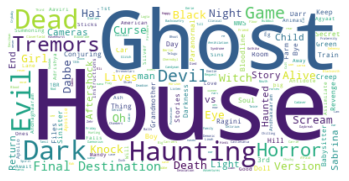

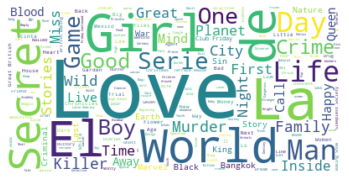

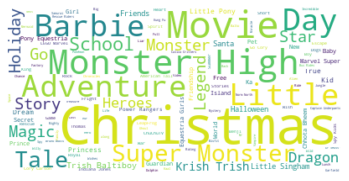

In [ ]:
for i in range(9):
  func_select_Category(i,'title')

# Cluster 0: Kids

# Kids, Anime, Animation

In [ ]:
df[df['cluster'] == 0][['type','title','director','cast','country','rating','listed_in','description']]

type  ...                                        description
108   TV Show  ...  After crash-landing on Earth, two royal teen a...
111   TV Show  ...  Paw-esome tales abound when singing furry frie...
162     Movie  ...  Parisian teen Marinette transforms herself int...
225   TV Show  ...  The extraordinary Baudelaire orphans face tria...
276   TV Show  ...  A big-hearted girl helps her Fuzzly friends wh...
...       ...  ...                                                ...
7750  TV Show  ...  Now that he's discovered the Pendulum Summonin...
7759  TV Show  ...  Teen surfer Zak Storm is mysteriously transpor...
7766  TV Show  ...  Zig, an island-bound hyena, will do anything t...
7775  TV Show  ...  A quest for freedom and legendary treasure beg...
7777  TV Show  ...  While living alone in a spooky town, a young g...

[422 rows x 8 columns]

#Cluster 1:  Musical, International, Indian

In [ ]:
df[df['cluster'] == 1][['type','title','director','cast','country','rating','listed_in','description']]


type  ...                                        description
79    Movie  ...  Winner of the 2014 Academy Award for Best Docu...
81    Movie  ...  The world's biggest K-pop festival marked its ...
135   Movie  ...  Given just seven days by a genie to find a gir...
143   Movie  ...  Four friends shake up their lives when they me...
164   Movie  ...  Despite her vain stepmother and mean stepsiste...
...     ...  ...                                                ...
7695  Movie  ...  The patriarch of a wealthy family with one ind...
7773  Movie  ...  This introspective rockumentary follows the ca...
7783  Movie  ...  A scrappy but poor boy worms his way into a ty...
7784  Movie  ...  In this documentary, South African rapper Nast...
7786  Movie  ...  This documentary delves into the mystique behi...

[332 rows x 8 columns]

#Cluster 2: Drama, International, Indian

In [ ]:
df[df['cluster'] == 2][['type','title','director','cast','country','rating','listed_in','description']]

type  ...                                        description
1     Movie  ...  After a devastating earthquake hits Mexico Cit...
8     Movie  ...  When a doctor goes missing, his psychiatrist w...
15    Movie  ...  Against the backdrop of Nigeria's looming inde...
18    Movie  ...  On India's Independence Day, a zany mishap in ...
20    Movie  ...  After accidentally connecting over the Interne...
...     ...  ...                                                ...
7768  Movie  ...  Two young parents struggle to keep their marri...
7769  Movie  ...  Three friends on an adventurous road trip/bach...
7770  Movie  ...  Recovering alcoholic Talal wakes up inside a s...
7780  Movie  ...  A drug dealer starts having doubts about his t...
7782  Movie  ...  When Lebanon's Civil War deprives Zozo of his ...

[1937 rows x 8 columns]

#Cluster 3: Documentaries, Sports


In [ ]:
df[df['cluster'] == 3][['type','title','director','cast','country','rating','listed_in','description']]

type  ...                                        description
13    Movie  ...  This intimate documentary follows rock star Ar...
25    Movie  ...  This real-life look at FBI counterterrorism op...
28    Movie  ...  Through her diary, Anne Frank's story is retol...
30    Movie  ...  This pawesome documentary explores how our fel...
35    Movie  ...  This documentary celebrates the 50th anniversa...
...     ...  ...                                                ...
7647  Movie  ...  A filmmaker trains the camera on her own famil...
7679  Movie  ...  Filmmaker John Huston narrates this Oscar-nomi...
7686  Movie  ...  Set against the 2015 Rugby World Cup, this doc...
7692  Movie  ...  Guillermo del Toro and Alfonso Cuarón discuss ...
7771  Movie  ...  Born without legs and stuck in foster care for...

[680 rows x 8 columns]

#Cluster 4: Drama, American, Adventure

In [ ]:
df[df['cluster'] == 4][['type','title','director','cast','country','rating','listed_in','description']]

type  ...                                        description
3       Movie  ...  In a postapocalyptic world, rag-doll robots hi...
4       Movie  ...  A brilliant group of students become card-coun...
7       Movie  ...  After one of his high school students attacks ...
10      Movie  ...  A farmer pens a confession admitting to his wi...
14      Movie  ...  Stranded when the Earth is suddenly destroyed ...
...       ...  ...                                                ...
7729    Movie  ...  After a one-night stand, Holly develops a dang...
7735  TV Show  ...  A female food blogger is hired as a personal c...
7736    Movie  ...  When a divorced writer gets a letter from an o...
7758    Movie  ...  Zack and Miri make and star in an adult film t...
7774    Movie  ...  A political cartoonist, a crime reporter and a...

[1798 rows x 8 columns]

# Cluster 5: Comedy

In [ ]:
df[df['cluster'] == 5][['type','title','director','cast','country','rating','listed_in','description']]

type  ...                                        description
197   TV Show  ...  Comedy icon Carol Burnett returns to TV with a...
220     Movie  ...  Inspired by the variety shows of the 1970s, "A...
305     Movie  ...  Frenetic comic Adam Devine talks teen awkwardn...
307     Movie  ...  From "Heroes" to "Ice Cream Ladies" – Adam San...
310     Movie  ...  From Casino du Liban, Lebanese actor and comed...
...       ...  ...                                                ...
7718    Movie  ...  Daring comedian Yoo Byung-jae connects critici...
7719    Movie  ...  "Saturday Night Live Korea" writer-turned-come...
7744    Movie  ...  Revisiting life goals set in a letter written ...
7757    Movie  ...  The unorthodox, piano-playing stand-up star Za...
7779  TV Show  ...  An assortment of talent takes the stage for a ...

[373 rows x 8 columns]

#Cluster 6: Horror

In [ ]:
df[df['cluster'] == 6][['type','title','director','cast','country','rating','listed_in','description']]

type  ...                                        description
2       Movie  ...  When an army recruit is found dead, his fellow...
6       Movie  ...  After an awful accident, a couple admitted to ...
9       Movie  ...  An architect and his wife move into a castle t...
27      Movie  ...  As a grisly virus rampages a city, a lone man ...
41      Movie  ...  Young urbanites renovating a rundown house, an...
...       ...  ...                                                ...
7673    Movie  ...  In need of cash to help her sick brother, a yo...
7687    Movie  ...  This four-part anthology of short horror films...
7714    Movie  ...  With an all-important high school party at sta...
7755  TV Show  ...  A team embarks on a perilous cross-country mis...
7778    Movie  ...  Looking to survive in a world taken over by zo...

[350 rows x 8 columns]

# Cluster 7: International TV Shows

In [ ]:
df[df['cluster'] == 7][['type','title','director','cast','country','rating','listed_in','description']]

type  ...                                        description
0     TV Show  ...  In a future where the elite inhabit an island ...
5     TV Show  ...  A genetics professor experiments with a treatm...
11    TV Show  ...  In this dark alt-history thriller, a naïve law...
12    TV Show  ...  Archival video and new interviews examine Mexi...
16    TV Show  ...  As a psychology professor faces Alzheimer's, h...
...       ...  ...                                                ...
7743  TV Show  ...  Two lonely singles meet on a blind date and sl...
7746  TV Show  ...  A group of women leaves Kuwait to attend unive...
7752  TV Show  ...  It's drama Down Under when expectant mothers w...
7767  TV Show  ...  Strong-willed, middle-class Kashaf and carefre...
7785  TV Show  ...  Dessert wizard Adriano Zumbo looks for the nex...

[1388 rows x 8 columns]

#Cluster 8: Family Movies

In [ ]:
df[df['cluster'] == 8][['type','title','director','cast','country','rating','listed_in','description']]

type  ...                                        description
113   Movie  ...  When a small town's letters to Santa accidenta...
145   Movie  ...  A gymnast lacks the confidence she needs to re...
147   Movie  ...  Recruited by a secret society of babysitters, ...
154   Movie  ...  With his carefree lifestyle on the line, a wea...
155   Movie  ...  When a grieving teen must work off her debt to...
...     ...  ...                                                ...
7745  Movie  ...  When a father of eight and a mother of 10 prep...
7761  Movie  ...  A girl discovers a dog-training app that can g...
7772  Movie  ...  At Christmas, Zip and Zap take a trip with the...
7776  Movie  ...  When his cruel uncle abandons him, a young orp...
7781  Movie  ...  Dragged from civilian life, a former superhero...

[507 rows x 8 columns]

# Better Visualisation for Clusters using Bokeh!!!

In [ ]:
from sklearn.manifold import TSNE

x_embedded = TSNE(n_components=2).fit_transform(X)

x_embedded.shape

(7787, 2)

In [ ]:
#import for bokeh
from bokeh.models import ColumnDataSource, HoverTool, LinearColorMapper, CustomJS
from bokeh.palettes import Category20
from bokeh.transform import linear_cmap
from bokeh.io import output_file, show
from bokeh.transform import transform
from bokeh.io import output_notebook
from bokeh.plotting import figure
from bokeh.layouts import column
from bokeh.models import RadioButtonGroup
from bokeh.models import TextInput
from bokeh.layouts import gridplot
from bokeh.models import Div
from bokeh.models import Paragraph
from bokeh.layouts import column, widgetbox

In [ ]:
output_notebook()
y_labels = label

# data sources
source = ColumnDataSource(data=dict(
    x= x_embedded[:,0], 
    y= x_embedded[:,1],
    x_backup = x_embedded[:,0],
    y_backup = x_embedded[:,1],
    desc= y_labels, 
    titles= df['title'],
    directors = df['director'],
    cast = df['cast'],
    description = df['description'],
    listed_in = df['listed_in'],
    rating = df['rating'],
    country = df['country'],
    labels = ["C-" + str(x) for x in y_labels]
    ))

# Hover to see same cluster movies/shows

In [ ]:
# hover over information
hover = HoverTool(tooltips=[
    ("Title", "@titles"),
    ("Director(s)", "@directors"),
    ("Cast", "@cast"),
    ("Description", "@description"),
    ("listed_in","@listed_in"),
    ("rating","@rating"),
    ("country","@country")
],
                 point_policy="follow_mouse")

# map colors
mapper = linear_cmap(field_name='desc', 
                     palette=Category20[20],
                     low=min(y_labels) ,high=max(y_labels))


# prepare the figure
p = figure(plot_width=800, plot_height=800, 
           tools=[hover, 'pan', 'wheel_zoom', 'box_zoom', 'reset'], 
           title="Netflix Movies and Tv Shows", 
           toolbar_location="right")

# plot
p.scatter('x', 'y', size=5, 
          source=source,
          fill_color=mapper,
          line_alpha=0.3,
          line_color="black",
          legend = 'labels')

# option
option = RadioButtonGroup(labels=["C-0", "C-1", "C-2",
                                  "C-3", "C-4", "C-5",
                                  "C-6", "C-7", "C-8",
                                  ], 
                          active=9)

# search box
#keyword = TextInput(title="Search:", callback=keyword_callback)
#header
header = Div(text="""<h1>Find similar movies / tv shows in corresponding Cluster</h1>""")

# show
show(column(header,p))



* 0: "Kids, Animation, Anime"
* 1: "Musical International, Indian"
* 2: "Drama, International, Indian"
* 3: "Documentaries, Sports"
* 4: "Drama, American, Adventure"
* 5: "Comedy",
* 6: "Horror"
* 7: "International TV Shows"
* 8: "Family Movies" 



### ML Model - 2

###Recommendation System

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# defining new dataframe for building recommandation system
recommender_df = df.copy()

# reseting index
recommender_df.reset_index(inplace=True)

# checking whether or not reset index properly 
recommender_df[['show_id', 'title', 'description']]

show_id                                    title  \
0         s1                                       3%   
1         s2                                     7:19   
2         s3                                    23:59   
3         s4                                        9   
4         s5                                       21   
...      ...                                      ...   
7772   s7783                                     Zozo   
7773   s7784                                   Zubaan   
7774   s7785                        Zulu Man in Japan   
7775   s7786                    Zumbo's Just Desserts   
7776   s7787  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

                                            description  
0     In a future where the elite inhabit an island ...  
1     After a devastating earthquake hits Mexico Cit...  
2     When an army recruit is found dead, his fellow...  
3     In a postapocalyptic world, rag-doll robots hi...  
4     A brilliant group of students become card-coun...  
...                                                 ...  
7772  When Lebanon's Civil War deprives Zozo of his ...  
7773  A scrappy but poor boy worms his way into a ty...  
7774  In this documentary, South African rapper Nast...  
7775  Dessert wizard Adriano Zumbo looks for the nex...  
7776  This documentary delves into the mystique behi...  

[7777 rows x 3 columns]

In [ ]:
# calculate cosine similarity
similarity = cosine_similarity(X)
similarity

array([[ 1.        ,  0.08469703,  0.02081349, ..., -0.0198339 ,
         0.01359728, -0.01747264],
       [ 0.08469703,  1.        , -0.00524675, ...,  0.0684012 ,
        -0.00948995, -0.01096327],
       [ 0.02081349, -0.00524675,  1.        , ..., -0.00306333,
        -0.01248415, -0.01596307],
       ...,
       [-0.0198339 ,  0.0684012 , -0.00306333, ...,  1.        ,
        -0.00572064,  0.20004005],
       [ 0.01359728, -0.00948995, -0.01248415, ..., -0.00572064,
         1.        ,  0.04367707],
       [-0.01747264, -0.01096327, -0.01596307, ...,  0.20004005,
         0.04367707,  1.        ]])

In [ ]:
def recommend(movie):
    '''
    This function list down top ten movies on the basis of similarity score for that perticular movie.
    '''
    print(f"If you liked '{movie}', you may also enjoy: \n")

    # find out index position
    index = recommender_df[recommender_df['title'] == movie].index[0]

    # sorting on the basis of simliarity score, In order to find out distaces from recommended one
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x:x[1])
    
    # listing top ten recommenaded movie
    for i in distances[1:11]:
        print(df.iloc[i[0]].title)

In [ ]:
recommend('Happy New Year')

If you liked 'Happy New Year', you may also enjoy: 

Om Shanti Om
Chennai Express
Main Hoon Na
Dance Academy
Bbuddah Hoga Terra Baap
Don
Kabhi Alvida Naa Kehna
Don 2
Kung Fu Yoga
Aarakshan


In [ ]:
recommend('The Witcher')

If you liked 'The Witcher', you may also enjoy: 

The Witcher: A Look Inside the Episodes
Making The Witcher
Love & Anarchy
The Day Will Come
Ripper Street
Oh No! It's an Alien Invasion
A.D. Kingdom and Empire
Mohawk
Clash of the Titans
Schitt's Creek


In [ ]:
recommend('Inception')

If you liked 'Inception', you may also enjoy: 

Apollo 18
Peaky Blinders
Æon Flux
Solomon Kane
Aamir
Cabins in the Wild with Dick Strawbridge
Dead in a Week (Or Your Money Back)
Dragonheart
The Titan
Lionheart


In [ ]:
recommend('Breaking Bad')

If you liked 'Breaking Bad', you may also enjoy: 

Better Call Saul
Hormones
Servant of the People
W/ Bob & David
The Underclass
Time Share
21 Thunder
The School Nurse Files
Answer for Heaven
The Bad Kids


## ***8.*** ***Future Work (Optional)***

*   More Post Cluster Analysis
*   Integrate Netflix dataset with other data set and present more insights and clusters.
* We could have done some research on recommendation system.

# **Conclusion**

1. It was interesting to find that majority of the content available on Netflix is Movies.

2. But in the recent years it has been focusing more on Tv-Shows.

3. United States and India are among the top 5 countries that produce all of the available content on the platform.

4. Also 6 of the actors among the top ten actors with maximum content are from India.

5. TV-MA tops the charts, indicating that mature content is more popular on Netflix.

6. By applying clustering models like Kmeans clustering on dataset we got the best cluster arrangements i.e optimal number of cluster is equal to 9 .

7. A content based recommender system was also built. 

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***